# Image Data Augmentation with Keras

![Horizontal Flip](./assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [9]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.3.0


# Task 2: Rotation

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 45
)

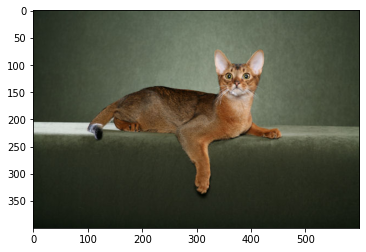

In [15]:
image_path = './images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


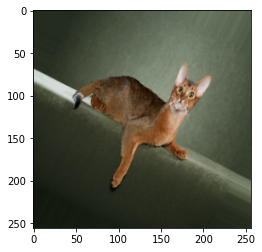

In [16]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 2 classes.


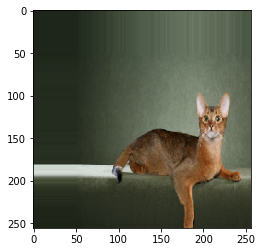

In [18]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 2 classes.


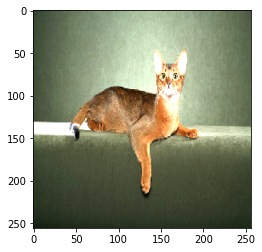

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 2 classes.


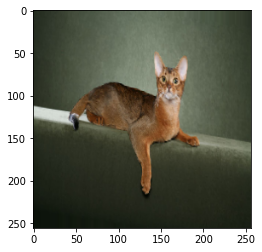

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 2 classes.


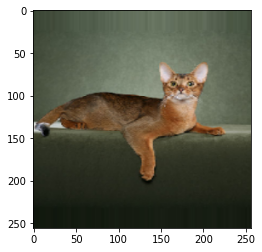

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range = .5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 2 classes.


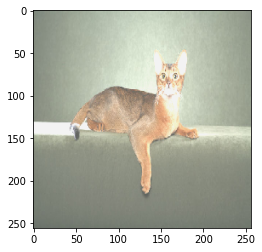

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 2 classes.


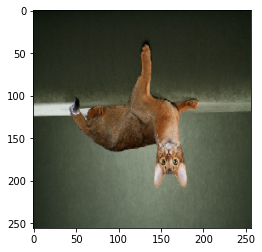

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 11s 0us/step


In [25]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.15816471 0.9813167 [[5]]
120.70756512369792


### Samplewise

In [28]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-8.940697e-08 1.0 [[3]]


# Task 10: Rescale and Preprocessing Function

In [34]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1.,
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input
)

In [35]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [36]:
print(x.mean(), x.std(), y)

-0.15857075 0.512852 [[1]]


# Task 11: Using in Model Training

In [39]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range=20
)

In [40]:
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False, input_shape=(32, 32, 3),
    pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [42]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=10
)

10/10 [==============================] - 2s 234ms/step - loss: 3.2570 - accuracy: 0.0906
